In [2]:
import numpy as np
import pandas as pd
import xarray as xr
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [46]:
# 1. Significant earthquakes since 2150 B.C.
Sig_Eqs = pd.read_csv('D:\lianxi\pddemo\data\earthquakes-2023-11-07_13-00-01_+0800.tsv', sep='\t')

# 1.1 先根据国家对数据分组，分别计算每个组的死亡总数，再从大到小排序前10个国家
Sig_Eqs.groupby(['Country']).sum()['Deaths'].sort_values(ascending=False)[0:10]

Country
CHINA         2075045.0
TURKEY        1188881.0
IRAN          1011449.0
ITALY          498478.0
SYRIA          439224.0
HAITI          323478.0
AZERBAIJAN     317219.0
JAPAN          279085.0
ARMENIA        191890.0
PAKISTAN       145083.0
Name: Deaths, dtype: float64

Text(0, 0.5, 'Total Number')

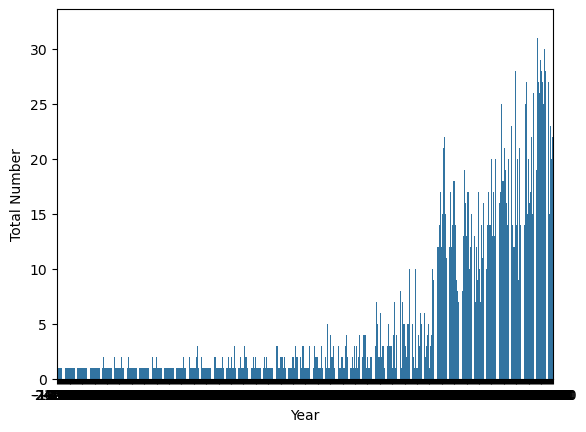

In [207]:
# 1.2 提取地震震级大于6的数据，再根据其发生的年份，进行频数的计算
#方法一
Sig_Eqs2 = Sig_Eqs.loc[ Sig_Eqs['Mag'] > 6.0]
SIG = Sig_Eqs2['Year'].value_counts()
# seaborn参考以下网址：https://www.zhihu.com/tardis/zm/art/462606364?source_id=1005
ax = sns.barplot(y=SIG.values, x=SIG.index)
plt.ylabel('Total Number')
# 不知道为什么用这种方式画图，一调xtick，整个图分布就变得很奇怪,下面用另一个方法画
#根据结果发现，地震发生的次数逐年上升，可能是由于板块运动加剧，造成地震频发

Text(0, 0.5, 'Total Number')

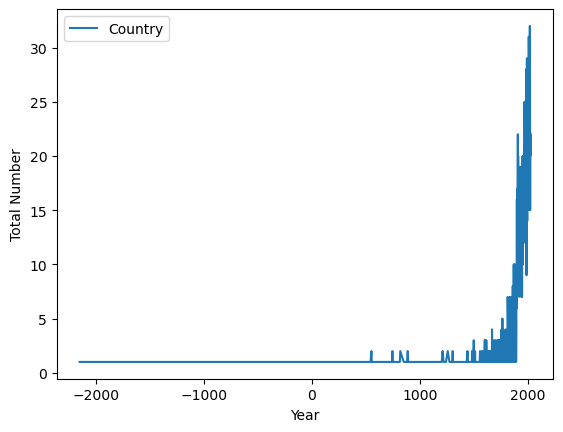

In [211]:
# 1.2 提取地震震级大于6的数据，再根据其发生的年份分组，进行频数的计算，直接画图
#方法二
Sig_Eqs.loc[ Sig_Eqs['Mag'] > 6.0].groupby(['Year']).count().loc[:,['Country']].plot()
plt.ylabel('Total Number')

In [154]:
#1.3 
df = Sig_Eqs.loc[:,['Country','Mag','Year','Mo','Dy']]
Country_List=Sig_Eqs.groupby(['Country']).count().reset_index()

def CountEq_LargestEq(C):
    Total_Number = df.groupby(['Country']).count()['Year'][C]
    Largest_Eqs = df.loc[(df['Country']==C)&(df['Mag']==df.groupby(['Country']).max()['Mag'][C])]
    D=Largest_Eqs[['Mag','Year','Mo','Dy']]
    return (Total_Number,D)

for i in Country_List['Country']: 
      print(i,CountEq_LargestEq(i))
        
#以下结果：国家下每行数字依次表示为此国家的（地震发生次数，最大地震级数，最大地震发生的年，月，日）

AFGHANISTAN (66,       Mag    Year   Mo   Dy
2727  8.1  1909.0  7.0  7.0)
ALBANIA (56,       Mag    Year   Mo    Dy
2395  7.5  1893.0  6.0  14.0)
ALGERIA (57,       Mag    Year    Mo    Dy
4449  7.1  1980.0  10.0  10.0)
ANTARCTICA (5,       Mag    Year   Mo    Dy
5010  8.1  1998.0  3.0  25.0)
ANTIGUA AND BARBUDA (3,       Mag    Year   Mo    Dy
1054  8.0  1690.0  4.0  16.0)
ARGENTINA (21,       Mag    Year   Mo    Dy
3492  7.8  1944.0  1.0  15.0)
ARMENIA (13,       Mag    Year    Mo   Dy
4704  6.8  1988.0  12.0  7.0)
ATLANTIC OCEAN (6,       Mag    Year    Mo    Dy
3445  7.8  1941.0  11.0  25.0
4280  7.8  1975.0   5.0  26.0)
AUSTRALIA (24,       Mag    Year   Mo    Dy
4715  8.2  1989.0  5.0  23.0)
AUSTRIA (7,      Mag    Year   Mo    Dy
752  6.6  1590.0  9.0  15.0)
AZERBAIJAN (16,       Mag    Year    Mo    Dy
975   6.9  1667.0  11.0   NaN
2552  6.9  1902.0   2.0  13.0)
AZORES (PORTUGAL) (27,       Mag    Year   Mo    Dy
4067  7.6  1968.0  2.0  28.0)
BANGLADESH (17,       Mag    Year  

RUSSIA (152,       Mag    Year    Mo   Dy
3658  9.0  1952.0  11.0  4.0)
RWANDA (5,       Mag    Year   Mo   Dy
5982  5.8  2015.0  8.0  7.0)
SAINT LUCIA (2, Empty DataFrame
Columns: [Mag, Year, Mo, Dy]
Index: [])
SAINT VINCENT AND THE GRENADINES (1, Empty DataFrame
Columns: [Mag, Year, Mo, Dy]
Index: [])
SAMOA (8,       Mag    Year   Mo    Dy
2897  8.3  1917.0  6.0  26.0)
SAUDI ARABIA (3,       Mag    Year   Mo    Dy
5625  5.7  2009.0  5.0  19.0)
SERBIA (15,       Mag    Year   Mo    Dy
2984  6.0  1922.0  3.0  24.0)
SIERRA LEONE (1,       Mag    Year   Mo    Dy
1444  5.2  1795.0  5.0  20.0)
SLOVAKIA (3,       Mag    Year   Mo    Dy
5266  2.2  2004.0  1.0  10.0)
SLOVENIA (22,      Mag    Year   Mo    Dy
630  6.5  1511.0  3.0  26.0)
SOLOMON ISLANDS (62,       Mag    Year   Mo    Dy
4343  8.1  1977.0  4.0  21.0
5479  8.1  2007.0  4.0   1.0)
SOLOMON SEA (2,       Mag    Year   Mo   Dy
2419  7.3  1895.0  3.0  6.0)
SOUTH AFRICA (14,       Mag    Year    Mo    Dy
3460  7.9  1942.0  11.0  10.0)

Text(0, 0.5, 'Wind Speed(m/s)')

<Figure size 1200x600 with 0 Axes>

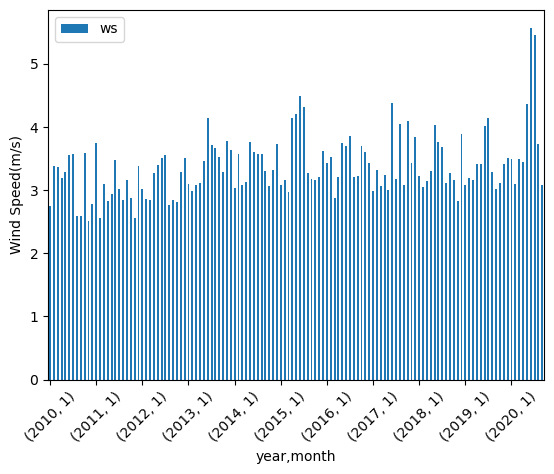

In [212]:
#2 
#参考网页：https://blog.csdn.net/chenhepg/article/details/118799729
BA = pd.read_csv('D:\lianxi\pddemo\data\\2281305.csv')
BA['ws']=BA['WND'].str.split(',').str[3]
BA['year']=pd.to_datetime(BA['DATE'].str.split('T').str[0]).dt.year
BA['month']=pd.to_datetime(BA['DATE'].str.split('T').str[0]).dt.month

plt.figure(figsize=(12,6)) 
fig,ax = plt.subplots()
BA1=BA.loc[(BA['ws']!="9999")]
BA1['ws']=BA1['ws'].astype(float) /10
BA2=BA1[['year']]
BA2['month']=BA1['month']
BA2['ws']=BA1['ws']
BA2.groupby([BA2['year'],BA2['month']]).mean('ws').plot(kind='bar',ax=ax)
plt.xticks(range(0,129,12),rotation=45)
plt.ylabel('Wind Speed(m/s)')
#根据结果看，近几年风速的总体趋势没有明显变化，仅在2020年有两个月风速较高

In [178]:
# 3 
#3.1 读取数据后，先将新建列表示数据的时间（月.日.时），然后新建去除空值，及小于0的无效值后的表格为：UAV1
UAV = pd.read_csv('D:\lianxi\pddemo\data\\non_flight_ground_base.csv')
UAV['day'] = pd.to_datetime(UAV['UAV_data'].str.split(' ').str[0]).dt.day
UAV['month'] = pd.to_datetime(UAV['UAV_data'].str.split(' ').str[0]).dt.month
UAV['hour'] = pd.to_datetime(UAV['UAV_data'].str.split(' ').str[1]).dt.hour
UAV = UAV.loc[(UAV['UAV_O3']!=" ")&(UAV['UAV_O3']>0)]
UAV

,UAV_data,UAV_POM_O3,UAV_CO,UAV_NO2,UAV_PM2_5,UAV_PM10,UAV_O3,ground_POM_O3,ground_CO,ground_nNO2,...,ground_PM10,ground_O3,CO,PM?.?,PM??,O?,NO?,day,month,hour
3,07/18/2023 13:37:00,14.120000,0.512629,0.266414,6.766667,6.766667,26.219293,NaN,NaN,NaN,...,NaN,NaN,0.379,5.512,7.059,50.443,101.297,18,7,13
4,07/18/2023 15:08:00,11.760000,0.635892,4.419332,9.000000,9.000000,77.130483,NaN,NaN,NaN,...,NaN,NaN,0.369,9.259,11.185,100.008,54.113,18,7,15
5,07/18/2023 15:09:00,10.556667,0.636496,9.559548,11.766667,12.166667,74.148364,NaN,NaN,NaN,...,NaN,NaN,0.359,8.676,11.174,95.490,45.764,18,7,15
6,07/18/2023 15:10:00,8.880000,0.635771,13.963209,11.000000,11.833333,75.870204,NaN,NaN,NaN,...,NaN,NaN,0.376,8.814,11.180,93.172,51.641,18,7,15
7,07/18/2023 15:11:00,6.623333,0.627433,7.130483,11.100000,11.900000,64.261032,NaN,NaN,NaN,...,NaN,NaN,0.381,9.110,11.228,97.413,69.602,18,7,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5924,08/02/2023 23:20:00,-9.776667,0.454985,0.940283,2.466667,2.466667,45.164466,NaN,NaN,NaN,...,NaN,NaN,0.402,7.187,13.967,58.067,35.797,2,8,23
5925,08/02/2023 23:21:00,0.620000,0.455590,52.326775,7.433333,7.733333,91.567997,NaN,NaN,NaN,...,NaN,NaN,0.403,7.187,13.969,58.944,37.737,2,8,23
5926,08/02/2023 23:22:00,14.816667,0.473716,84.484468,14.100000,14.733333,102.702991,NaN,NaN,NaN,...,NaN,NaN,0.410,7.187,13.979,59.080,43.153,2,8,23
5927,08/02/2023 23:23:00,18.393333,0.504895,74.235379,13.066667,13.500000,93.878012,NaN,NaN,NaN,...,NaN,NaN,0.422,7.187,13.979,59.804,27.954,2,8,23


Text(0, 0.5, 'Conc.(µg/m3)')

<Figure size 1500x800 with 0 Axes>

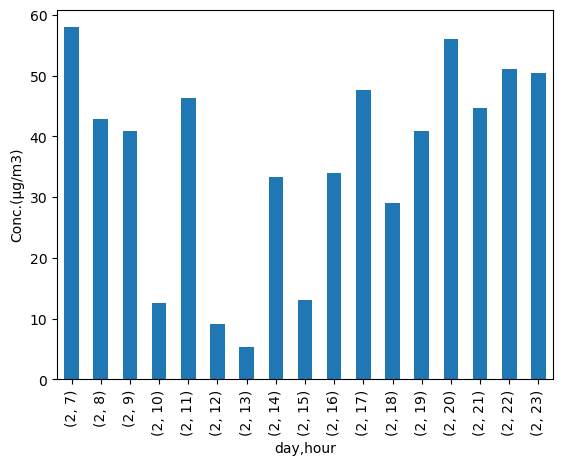

In [179]:
#3.2 对2号的NO2的数据作图，看其小时平均浓度
UAV1 = UAV.loc[(UAV['day']== 2)]
plt.figure(figsize=(15,8))
fig,ax = plt.subplots()
UAV1['UAV_NO2'].groupby([UAV1['day'],UAV1['hour']]).mean('UAV_NO2').plot(kind='bar',ax=ax)
plt.ylabel('Conc.(µg/m3)')

In [194]:
#3.3
#Check1 剔除异常值后在所有观测天中:臭氧最大值(指UAV上测到的值)
UAV["UAV_O3"].max()

218.4220763

In [193]:
#3.3
#Check2 剔除异常值后8月2日一天内:NO2浓度最小值(指UAV上测到的值)
UAV1["UAV_NO2"].min()

0.109699733

In [192]:
#3.3
#Check3 剔除异常值后8月2日一天内:PM2.5日平均浓度(指UAV上测到的值)
UAV1["UAV_PM2_5"].mean()

14.5613019417997

In [213]:
#3.3
#Check4 剔除异常值后8月2日一天内:CO小时平均浓度(指UAV上测到的值)
UAV1["UAV_CO"].median()

0.541027667

In [196]:
#3.3
#Check5 剔除异常值后8月2日一天内:CO小时平均浓度(指UAV上测到的值)
UAV1['UAV_CO'].groupby([UAV1['day'],UAV1['hour']]).mean('UAV_CO')

day  hour
2    7       0.546214
     8       0.510623
     9       0.502829
     10      0.494464
     11      0.557078
     12      0.505844
     13      0.514554
     14      0.559367
     15      0.536459
     16      0.557491
     17      0.587431
     18      0.560989
     19      0.574486
     20      0.578153
     21      0.549125
     22      0.538039
     23      0.503722
Name: UAV_CO, dtype: float64